Columns in the dataset

Species: penguin species (Chinstrap, Adélie, or Gentoo)
Island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
culmen_length_mm: culmen length (mm)
culmen_depth_mm: culmen depth (mm)
flipper_length_mm: flipper length (mm)
body_mass_g: body mass (g)
Sex: penguin sex

What is culmen?
The upper margin of the beak or bill is referred to as the culmen and the measurement is taken using calipers with one jaw at the tip of the upper mandible and the other at base of the skull or the first feathers depending on the standard chosen.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
# url = 'https://raw.githubusercontent.com/dataprofessor/streamlit_freecodecamp/main/app_8_classification_penguins/penguins_cleaned.csv'
dfStudy = pd.read_csv('penguins_lter.csv')
df = pd.read_csv('penguins_size.csv')
dfStudy.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [4]:
# description
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [5]:
print(df.cov())
print(df.corr())

                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm          29.807054        -2.534234          50.375765   
culmen_depth_mm           -2.534234         3.899808         -16.212950   
flipper_length_mm         50.375765       -16.212950         197.731792   
body_mass_g             2605.591912      -747.370093        9824.416062   

                     body_mass_g  
culmen_length_mm     2605.591912  
culmen_depth_mm      -747.370093  
flipper_length_mm    9824.416062  
body_mass_g        643131.077327  
                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.235053           0.656181   
culmen_depth_mm           -0.235053         1.000000          -0.583851   
flipper_length_mm          0.656181        -0.583851           1.000000   
body_mass_g                0.595110        -0.471916           0.871202   

                   body_mass_g  
culmen_length_mm      0.595110  
culmen_

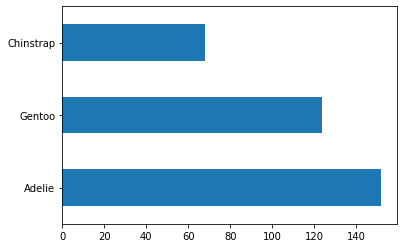

In [6]:
df['species'].value_counts().plot(kind='barh')
plt.show()

In [7]:
#checking number of null values in the data
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
df.drop(df[df['body_mass_g'].isnull()].index,axis=0, inplace=True)

In [9]:
x = ['sex', 'island', 'species']
for data in x:
    print(data)
    count = df[data].value_counts()
    print(count)


sex
MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64
island
Biscoe       167
Dream        124
Torgersen     51
Name: island, dtype: int64
species
Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64


In [10]:
#imputing the null values in sex with its mode

df['sex'] = df['sex'].fillna('MALE')

In [11]:
#faulty value in sex variable = '.'

df.drop(df[df['sex']=='.'].index, inplace=True)


In [12]:
df.isnull().sum()
df.to_csv()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

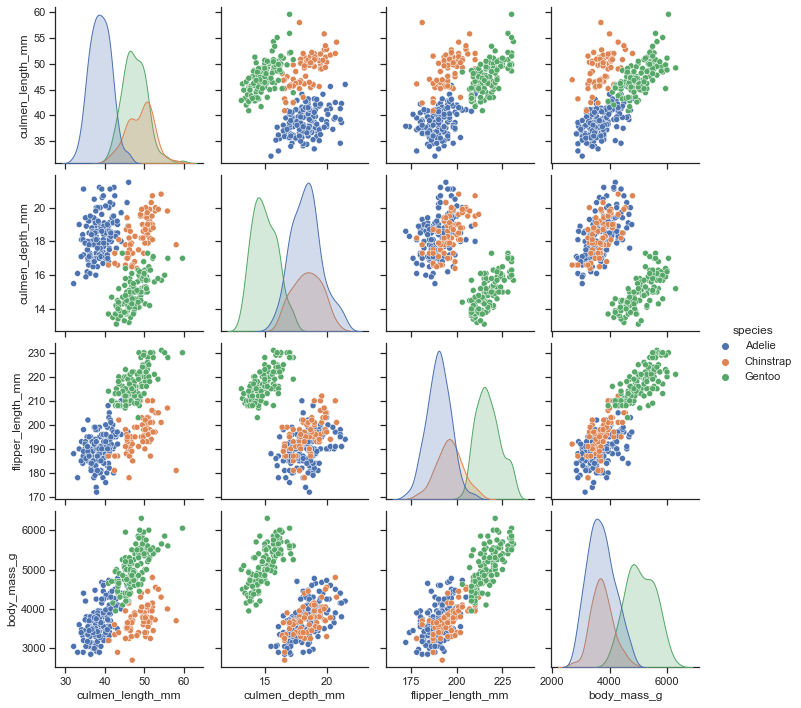

In [13]:

sns.set_theme(style="ticks")
sns.pairplot(df, hue="species")

Which island consists of most Penguins?
Answer: Biscoe


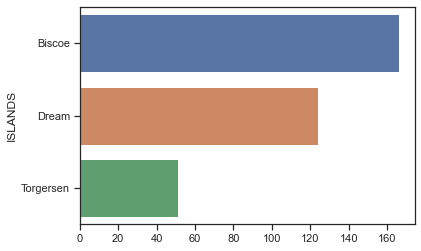

In [14]:
import numpy as np

unique, counts = np.unique(df['island'], return_counts=True)
scoreH = dict(zip(unique, counts))

fin_max = max(scoreH, key=scoreH.get)
print('Which island consists of most Penguins?')
print('Answer:',fin_max)

dfData = df['island'].value_counts().reset_index()
#The reset_index() method allows you reset the index back to the default 0, 1, 2 etc indexes.
#By default this method will keep the "old" idexes in a column named "index", to avoid this, use the drop parameter.

fig = sns.barplot(data=dfData, x='island', y='index')
fig.set(xlabel='', ylabel='ISLANDS')
plt.show()


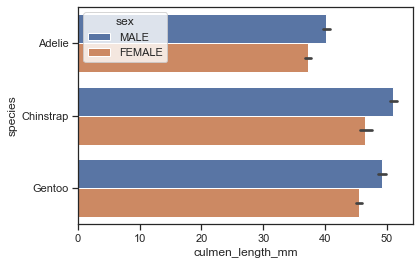

Which species have highest culmen_length?
Answer: Chinstrap(male and female)


In [15]:
sns.barplot(data=df, x='culmen_length_mm', y='species', hue='sex')
plt.show()
print('Which species have highest culmen_length?')
print('Answer: Chinstrap(male and female)')

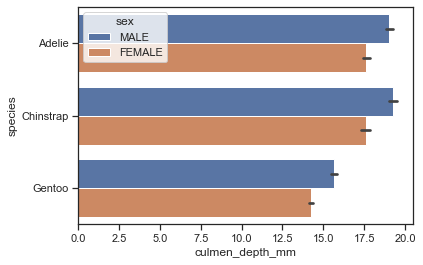

Which species have highest culmen_depth?
Answer: Chinstrap(male and female)


In [16]:
sns.barplot(data=df, x='culmen_depth_mm', y='species', hue='sex')
plt.show()
print('Which species have highest culmen_depth?')
print('Answer: Chinstrap(male and female)')

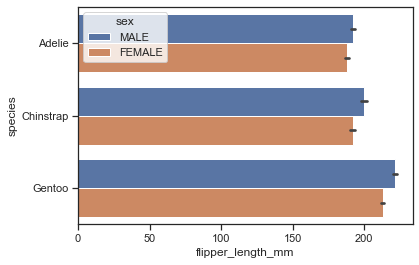

In [17]:
sns.barplot(data=df, x='flipper_length_mm', y='species', hue='sex')
plt.show()

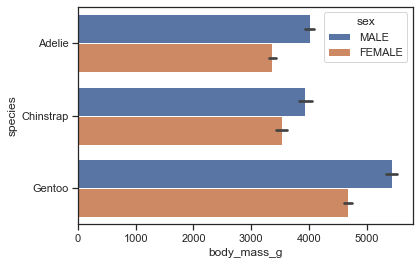

Which species have highest body_mass?
Answer: Gentoo(male and female) - Highly diverse values noticed


In [18]:
sns.barplot(data=df, x='body_mass_g', y='species', hue='sex')
plt.show()
print('Which species have highest body_mass?')
print('Answer: Gentoo(male and female) - Highly diverse values noticed')

In [19]:
#ML
#Classifier for Species Prediction
#Encoding the categorical variables - Sex, Island and Species where Species is the target variable

In [20]:
df_c = df.copy()
target = 'species'
encode = ['sex','island']

#encoding the Categorical Variables
for col in encode:
    dummy_var = pd.get_dummies(df_c[col], prefix=col)
    df_c = pd.concat([df_c, dummy_var], axis=1)
    del df_c[col]

t_mapper = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}
def target_encode(val):
    return t_mapper[val]

df_c['species'] = df_c['species'].apply(target_encode)

X = df_c.drop('species', axis=1)
y= df_c['species']

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(X, y)
pred = clf.predict(X)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

print('CONFUSION MATRIX')
print(confusion_matrix(y, pred))
print('CLASSIFICATION REPORT\n')
print(classification_report(y, pred))

CONFUSION MATRIX
[[151   0   0]
 [  0  68   0]
 [  0   0 122]]
CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00       122

    accuracy                           1.00       341
   macro avg       1.00      1.00      1.00       341
weighted avg       1.00      1.00      1.00       341

